['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'MedHouseVal']
Simple Linear Regression
MSE: 0.7091
R2: 0.4589
Regression Equation: y = 0.4193 * MedInc + 0.4446


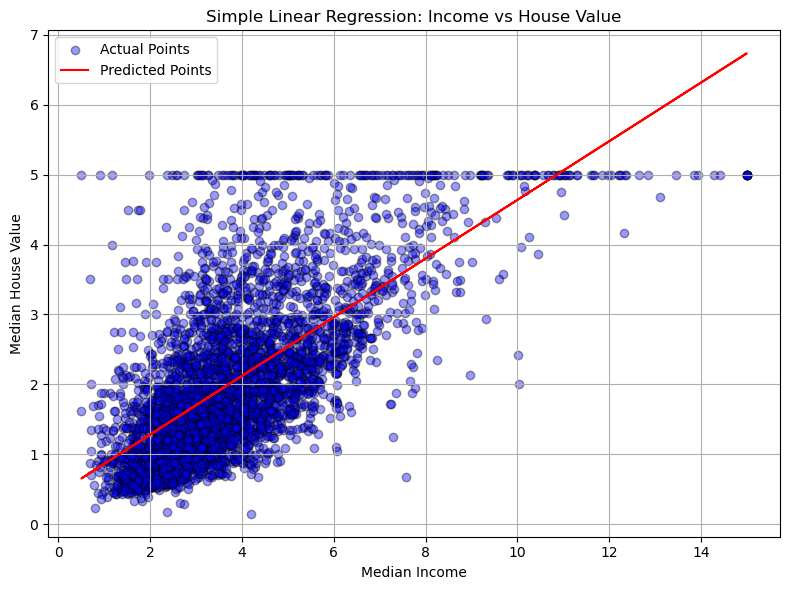

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('california_housing.csv')
print(df.columns.tolist())

X = df[['MedInc']]
y = df['MedHouseVal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Simple Linear Regression')
print(f'MSE: {mse:.4f}')
print(f'R2: {r2:.4f}')
print(f'Regression Equation: y = {model.coef_[0]:.4f} * {df.columns[0]} + {model.intercept_:.4f}')

plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', edgecolors='k', alpha=0.4, label='Actual Points')
plt.plot(X_test, y_pred, color='red', label='Predicted Points')
plt.title('Simple Linear Regression: Income vs House Value')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

Multiple Linear Regression
MSE: 0.5559
R2: 0.5758
Regression Equation: y = (0.4487) * MedInc + (0.0097) * HouseAge + (-0.1233) * AveRooms + (0.7831) * AveBedrms + (-0.0000) * Population + (-0.0035) * AveOccup + (-0.4198) * Latitude + (-0.4337) * Longitude + -37.0233


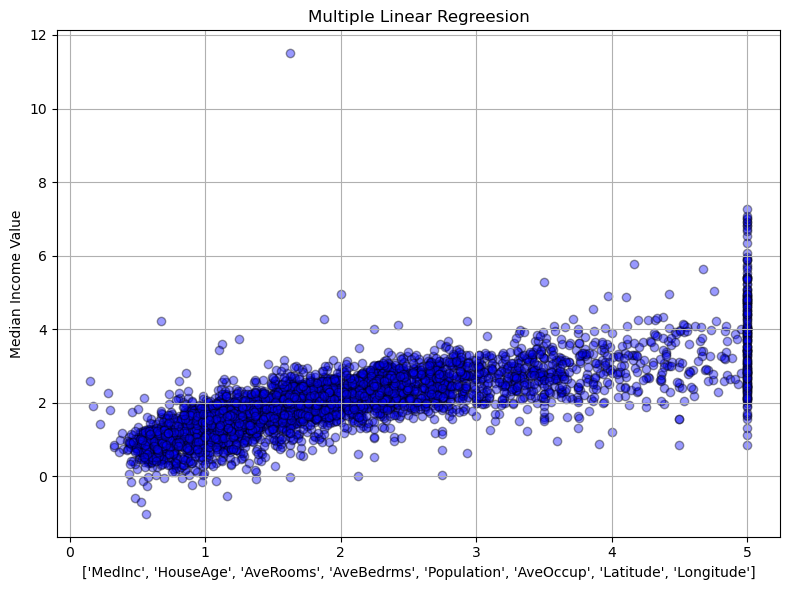

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('california_housing.csv')
X = df.drop(columns=['MedHouseVal'])
y = df['MedHouseVal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Multiple Linear Regression')
print(f'MSE: {mse:.4f}')
print(f'R2: {r2:.4f}')
coeff = ' + '.join([f'({coef:.4f}) * {col}' for coef, col in zip(model.coef_, X.columns)])
print(f'Regression Equation: y = {coeff} + {model.intercept_:.4f}')

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.4, edgecolors='k')
plt.title('Multiple Linear Regreesion')
plt.xlabel(X.columns.tolist())
plt.ylabel('Median Income Value')
plt.grid(True)
plt.tight_layout()
plt.show()

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
Logistic Regression
Accuracy Score: 1.0000
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



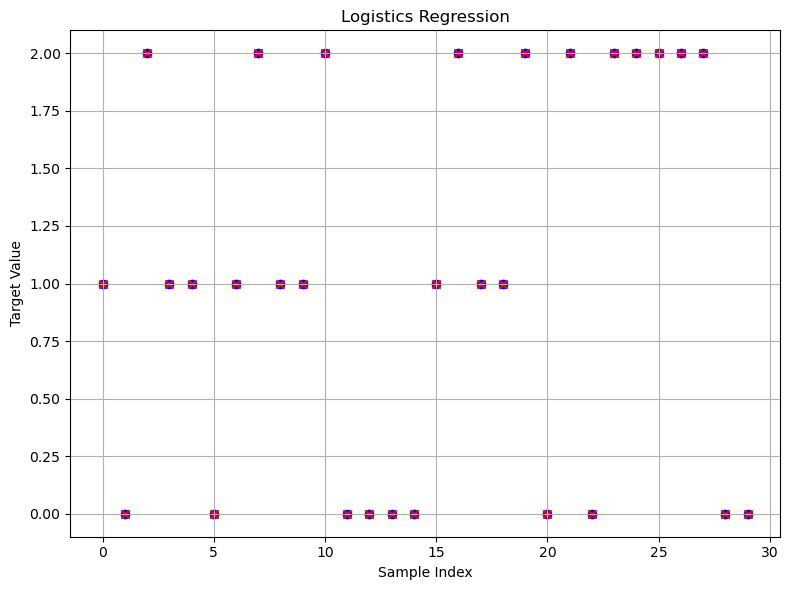

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

df = pd.read_csv('iris_dataset.csv')
X = df.drop(['target', 'species'], axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=100)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(y_pred)

acc = accuracy_score(y_test, y_test)
conf = confusion_matrix(y_test, y_pred)
clas = classification_report(y_test, y_pred, target_names=df['species'].unique())

print('Logistic Regression')
print(f'Accuracy Score: {acc:.4f}')
print(f'Confusion Matrix:\n {conf}')
print(f'Classification Report:\n {clas}')

plt.figure(figsize=(8, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(range(len(y_test)), y_pred, color='red', marker='x', label='Predicted')
plt.title('Logistics Regression')
plt.xlabel('Sample Index')
plt.ylabel('Target Value')
plt.grid(True)
plt.tight_layout()
plt.show()


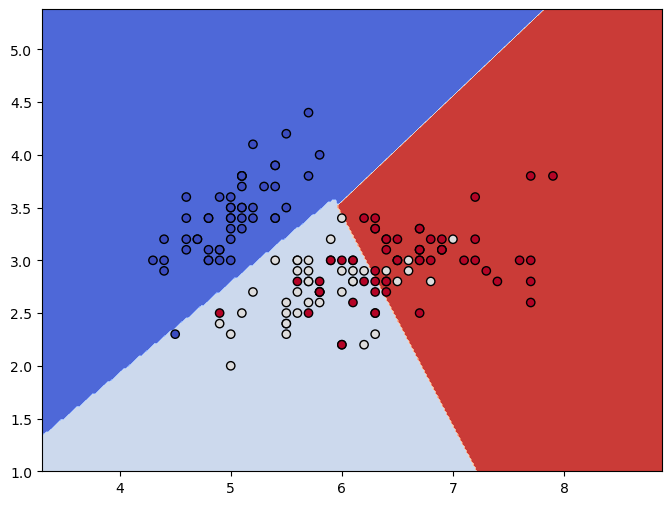

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

df = pd.read_csv('iris_dataset.csv')
X = df.iloc[:, :2]
y = df['target']

model = make_pipeline(StandardScaler(), SVC(kernel='linear', C=1))
model.fit(X.values, y)

plt.figure(figsize=(8,6))
h = 0.02
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
plt.show()


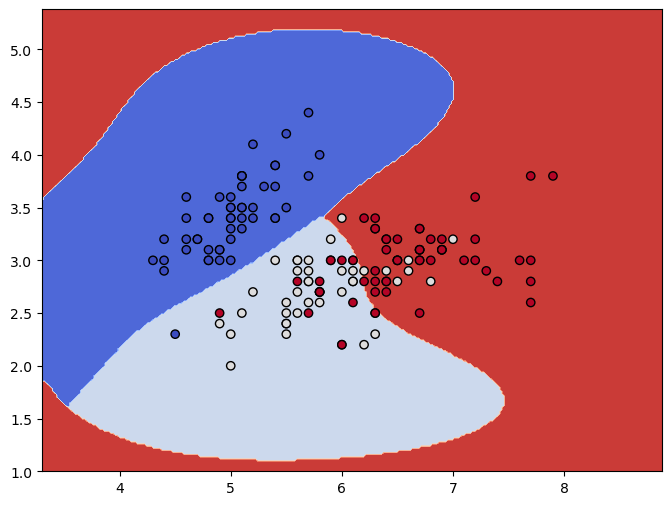

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

df = pd.read_csv('iris_dataset.csv')
X = df.iloc[:, :2]
y = df['target']

model = make_pipeline(StandardScaler(), SVC(kernel='rbf', C=1))
model.fit(X.values, y)

plt.figure(figsize=(8,6))
h = 0.02
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
plt.show()

['setosa' 'versicolor' 'virginica']
[0.72962445 0.22850762]


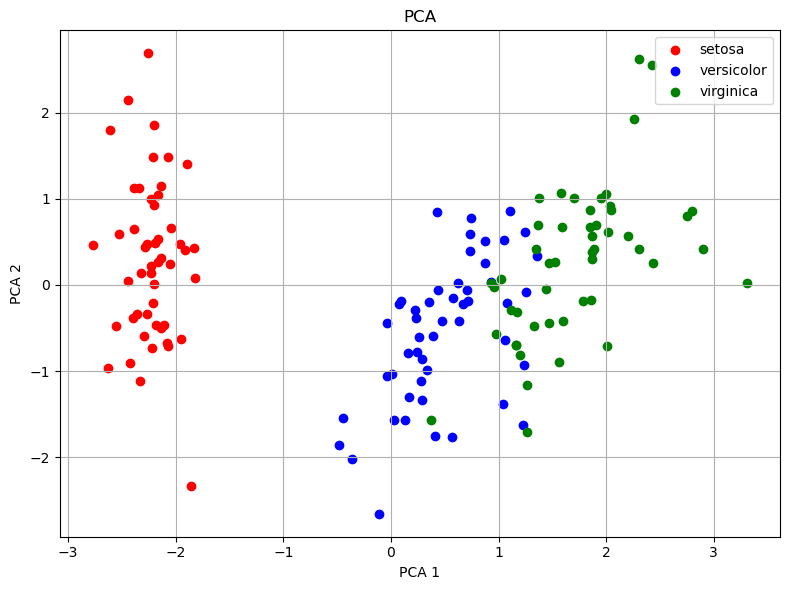

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('iris_dataset.csv')
X = df.drop(['target', 'species'], axis=1)
y = df['target']
target_names = df['species'].unique()
print(target_names)

X_std = StandardScaler().fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

print(pca.explained_variance_ratio_)

plt.figure(figsize=(8,6))
colors = ['red', 'blue', 'green']
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_pca[y==i, 0], X_pca[y==i, 1], color=color, label=target_name)

plt.title('PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.tight_layout()
plt.grid(True)
plt.legend()
plt.show()

['setosa' 'versicolor' 'virginica']


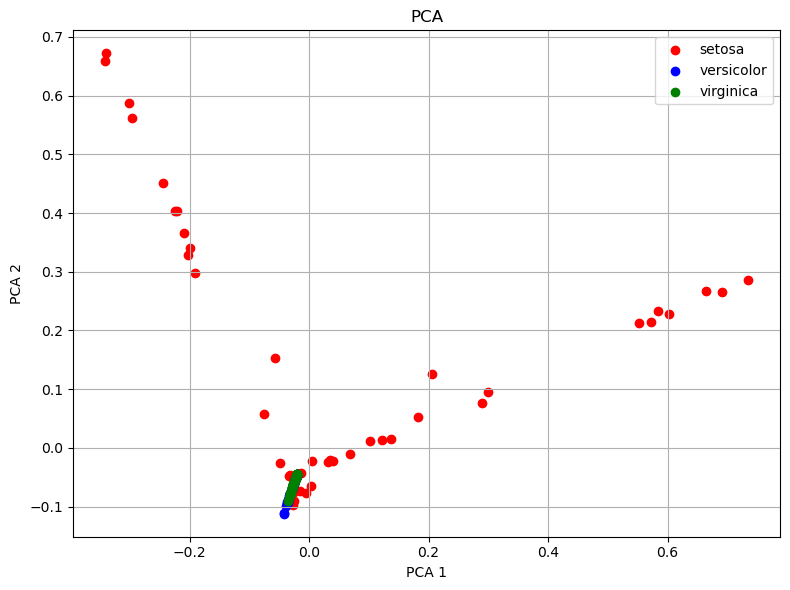

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('iris_dataset.csv')
X = df.drop(['target', 'species'], axis=1)
y = df['target']
target_names = df['species'].unique()
print(target_names)

X_std = StandardScaler().fit_transform(X)
k_pca = KernelPCA(n_components=2, kernel='rbf', gamma=15)
X_kpca = k_pca.fit_transform(X_std)

plt.figure(figsize=(8,6))
colors = ['red', 'blue', 'green']
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_kpca[y==i, 0], X_kpca[y==i, 1], color=color, label=target_name)

plt.title('PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.tight_layout()
plt.grid(True)
plt.legend()
plt.show()

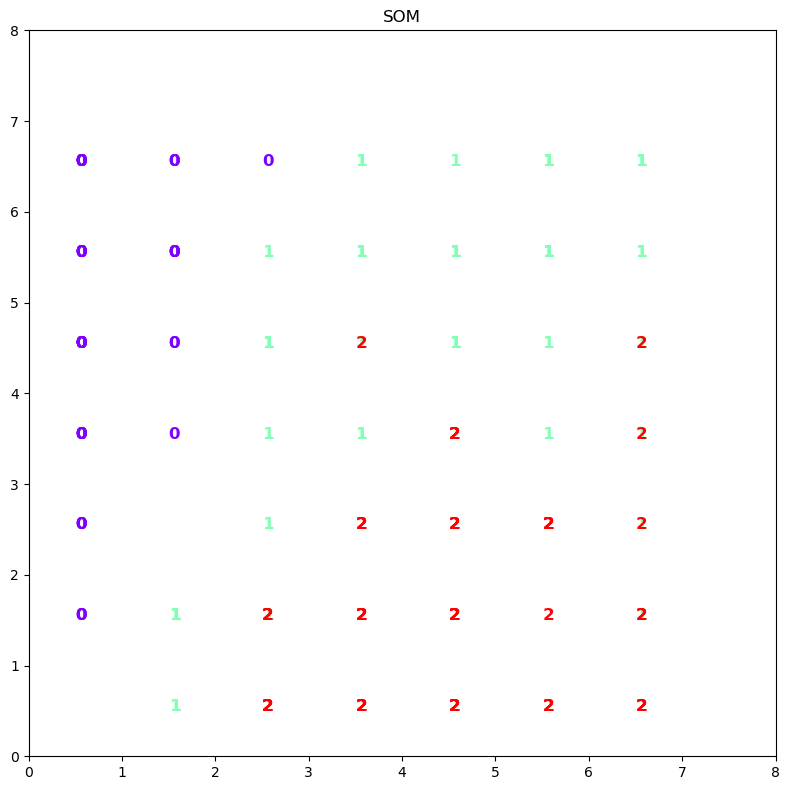

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom

df = pd.read_csv('iris_dataset.csv')
X = df.drop(['target', 'species'], axis=1)
y = df['target']
target_names = df['species'].unique()

X_scaled = MinMaxScaler().fit_transform(X)

som = MiniSom(x=7, y=7, input_len=X_scaled.shape[1], sigma=1.0, learning_rate=0.5)
som.random_weights_init(X_scaled)

som.train_random(X_scaled, num_iteration=1000)

plt.figure(figsize=(8, 8))
for i, x in enumerate(X_scaled):
    w = som.winner(x)
    plt.text(w[0]+0.5, w[1]+0.5, str(y[i]), fontdict={'size': 12, 'weight': 'bold'}, color=plt.cm.rainbow(y[i] / 2))

plt.title('SOM')
plt.xlim([0, 8])
plt.ylim([0, 8])
plt.grid(False)
plt.tight_layout()
plt.show()

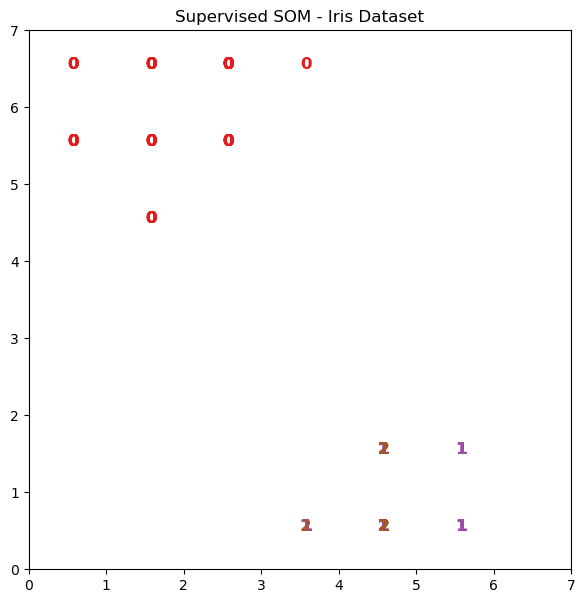

In [87]:
# install MiniSom (run in terminal or notebook)
# pip install minisom

from minisom import MiniSom
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import numpy as np
import matplotlib.pyplot as plt

# Load Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target  # labels (0, 1, 2)

# Normalize data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Initialize SOM
som = MiniSom(x=7, y=7, input_len=4, sigma=1.0, learning_rate=0.5, random_seed=42)

# Train SOM
som.train_random(X_scaled, 100)

# Assign each neuron a label (majority class of its samples)
winner_labels = np.zeros((7, 7), dtype=int)
for i in range(7):
    for j in range(7):
        winner_labels[i, j] = -1  # uninitialized

for idx, x in enumerate(X_scaled):
    i, j = som.winner(x)
    if winner_labels[i, j] == -1:
        winner_labels[i, j] = y[idx]
    else:
        # keep majority label (simple approach)
        if np.random.rand() > 0.5:
            winner_labels[i, j] = y[idx]

# Plot the SOM with class labels
plt.figure(figsize=(7, 7))
for i, x in enumerate(X_scaled):
    w = som.winner(x)
    plt.text(w[0] + 0.5, w[1] + 0.5, str(y[i]),
             color=plt.cm.Set1(y[i] / 3.0),
             fontdict={'weight': 'bold', 'size': 12})
plt.xlim([0, 7])
plt.ylim([0, 7])
plt.title("Supervised SOM - Iris Dataset")
plt.show()

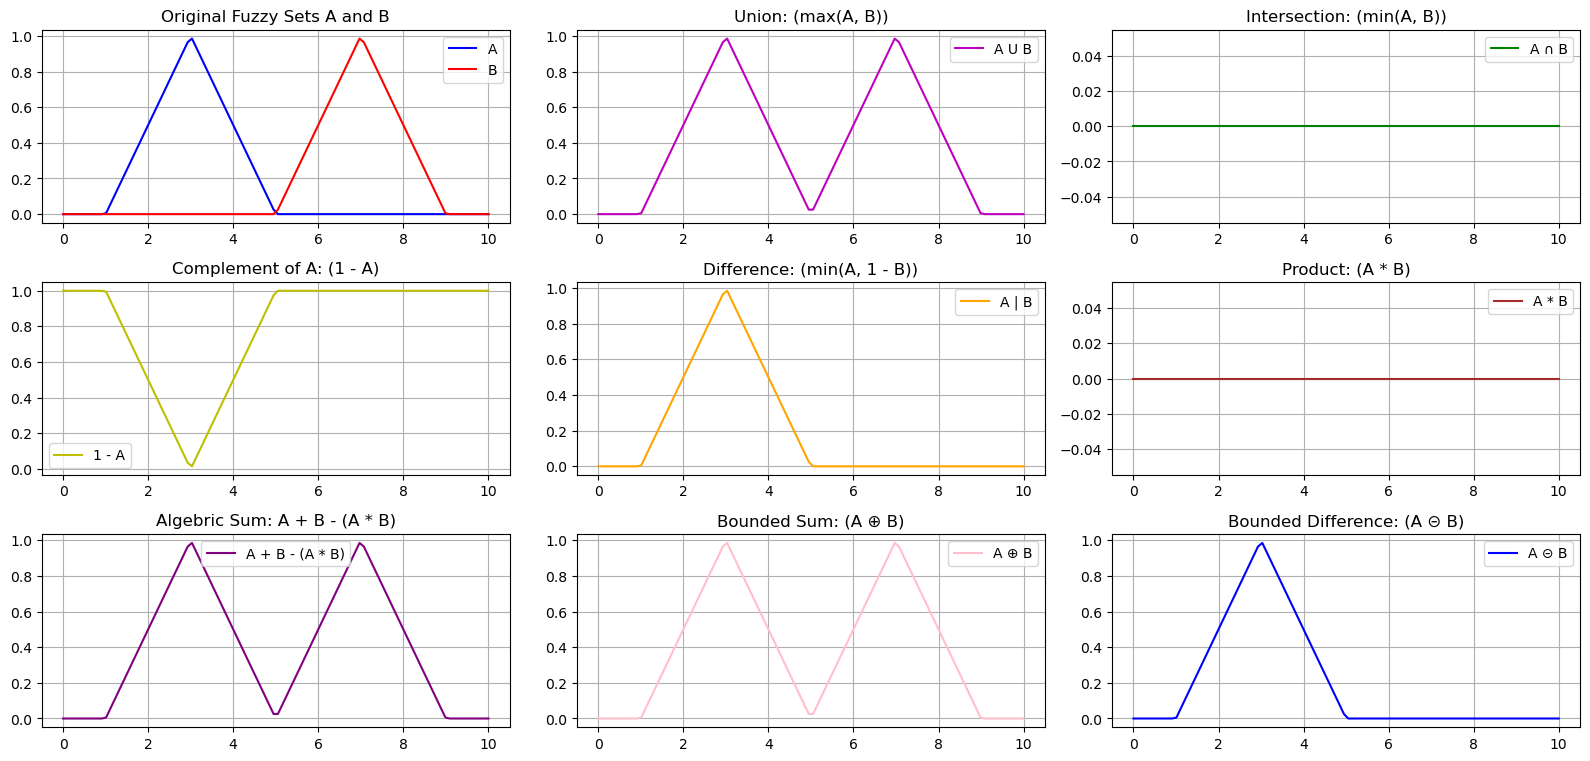

In [88]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 10, 100)

A = np.maximum(0, 1 - np.abs((x - 3) / 2))
B = np.maximum(0, 1 - np.abs((x - 7) / 2))


union = np.maximum(A, B)
intersection = np.minimum(A, B)
complement_A = 1 - A
difference = np.minimum(A, 1 - B)
product = A * B
algebric_sum = A + B - (A * B)
bounded_sum = np.minimum(1, A + B)
bounded_difference = np.maximum(0, A - B)

plt.figure(figsize=(16, 10))

plt.subplot(4, 3, 1)
plt.plot(x, A, 'b', label='A')
plt.plot(x, B, 'r', label='B')
plt.title('Original Fuzzy Sets A and B')
plt.legend()
plt.grid(True)

plt.subplot(4, 3, 2)
plt.plot(x, union, 'm', label='A U B')
plt.title('Union: (max(A, B))')
plt.legend()
plt.grid(True)

plt.subplot(4, 3, 3)
plt.plot(x, intersection, 'g', label='A ∩ B')
plt.title('Intersection: (min(A, B))')
plt.legend()
plt.grid(True)

plt.subplot(4, 3, 4)
plt.plot(x, complement_A, 'y', label='1 - A')
plt.title('Complement of A: (1 - A)')
plt.legend()
plt.grid(True)

plt.subplot(4, 3, 5)
plt.plot(x, difference, 'orange', label='A | B')
plt.title('Difference: (min(A, 1 - B))')
plt.legend()
plt.grid(True)

plt.subplot(4, 3, 6)
plt.plot(x, product, 'brown', label='A * B')
plt.title('Product: (A * B)')
plt.legend()
plt.grid(True)

plt.subplot(4, 3, 7)
plt.plot(x, algebric_sum, 'purple', label='A + B - (A * B)')
plt.title('Algebric Sum: A + B - (A * B)')
plt.legend()
plt.grid(True)

plt.subplot(4, 3, 8)
plt.plot(x, bounded_sum, 'pink', label='A ⊕ B')
plt.title('Bounded Sum: (A ⊕ B)')
plt.legend()
plt.grid(True)

plt.subplot(4, 3, 9)
plt.plot(x, bounded_difference, 'b', label='A ⊝ B')
plt.title('Bounded Difference: (A ⊝ B)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


===== FUZZY CONTROLLER SYSTEM =====
Input Temperature : 28°C
Output Fan Speed  : 63.74%



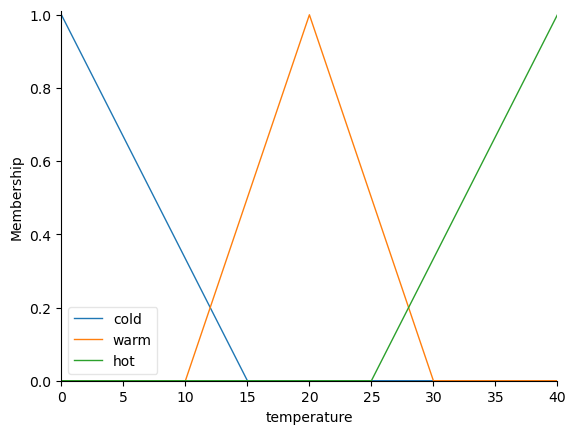

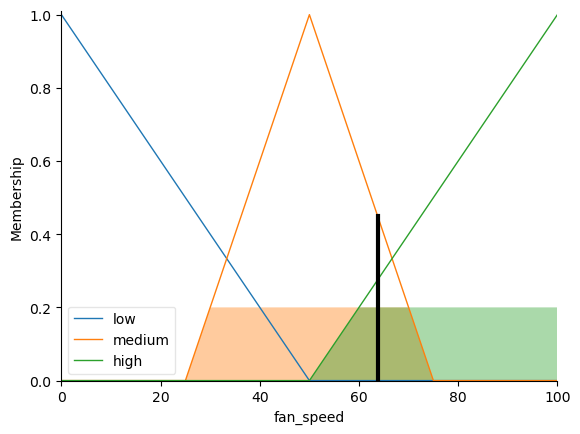

In [84]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt


temperature = ctrl.Antecedent(np.arange(0, 41, 1), 'temperature') 
fan_speed = ctrl.Consequent(np.arange(0, 101, 1), 'fan_speed')     

temperature['cold'] = fuzz.trimf(temperature.universe, [0, 0, 15])
temperature['warm'] = fuzz.trimf(temperature.universe, [10, 20, 30])
temperature['hot'] = fuzz.trimf(temperature.universe, [25, 40, 40])

fan_speed['low'] = fuzz.trimf(fan_speed.universe, [0, 0, 50])
fan_speed['medium'] = fuzz.trimf(fan_speed.universe, [25, 50, 75])
fan_speed['high'] = fuzz.trimf(fan_speed.universe, [50, 100, 100])

rule1 = ctrl.Rule(temperature['cold'], fan_speed['low'])
rule2 = ctrl.Rule(temperature['warm'], fan_speed['medium'])
rule3 = ctrl.Rule(temperature['hot'], fan_speed['high'])

fan_ctrl_system = ctrl.ControlSystem([rule1, rule2, rule3])
fan = ctrl.ControlSystemSimulation(fan_ctrl_system)

input_temp = 28
fan.input['temperature'] = input_temp

fan.compute()

print("\n===== FUZZY CONTROLLER SYSTEM =====")
print(f"Input Temperature : {input_temp}°C")
print(f"Output Fan Speed  : {fan.output['fan_speed']:.2f}%")
print("===================================\n")

temperature.view()
fan_speed.view(sim=fan)
plt.show()


Generation 0: Best Fitness = 1.8347
Generation 10: Best Fitness = 1.6508
Generation 20: Best Fitness = 1.6508
Generation 30: Best Fitness = 1.6508
Generation 40: Best Fitness = 1.6508

Best Solution Found:
x = 0.6516, f(x) = 1.6508


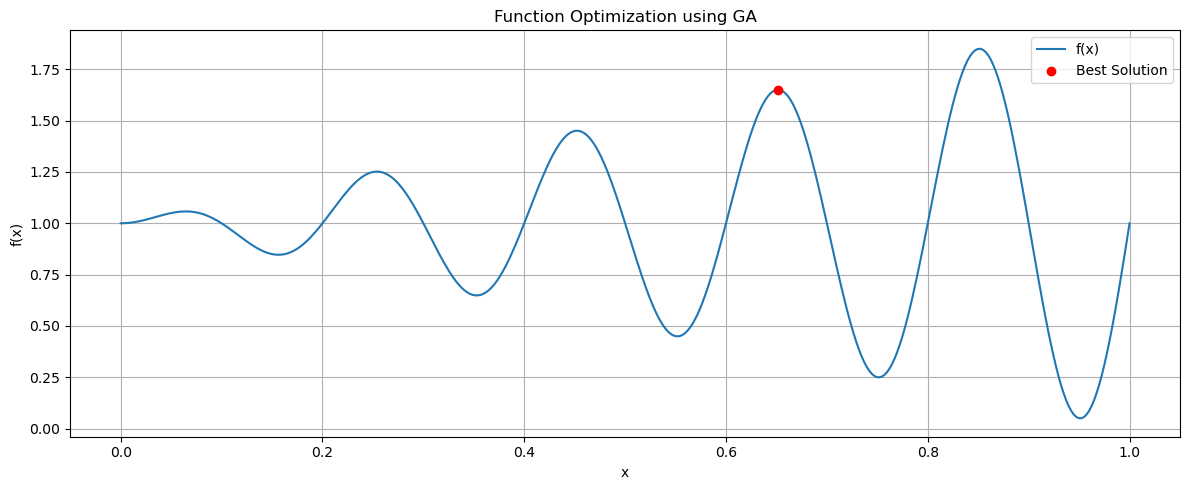

In [85]:
# --------------------------------------------
# Genetic Algorithm (GA) - Function Optimization
# --------------------------------------------

import numpy as np
import matplotlib.pyplot as plt

# Step 1: Define the objective function to maximize
def fitness_function(x):
    return x * np.sin(10 * np.pi * x) + 1.0  # sample nonlinear function

# Step 2: Create initial population (random values between 0 and 1)
population_size = 20
num_generations = 50
mutation_rate = 0.1

population = np.random.rand(population_size)

# Step 3: Define helper functions
def selection(pop, fitness):
    """Select two parents using tournament selection."""
    idx = np.random.choice(len(pop), 4, replace=False)
    selected = sorted(idx, key=lambda i: fitness[i], reverse=True)
    return pop[selected[0]], pop[selected[1]]

def crossover(parent1, parent2):
    """Single-point crossover."""
    point = np.random.rand()
    child = point * parent1 + (1 - point) * parent2
    return child

def mutate(child):
    """Random mutation."""
    if np.random.rand() < mutation_rate:
        child += np.random.uniform(-0.1, 0.1)
        child = np.clip(child, 0, 1)  # keep within [0,1]
    return child

# Step 4: Run the GA
best_fitness_history = []

for gen in range(num_generations):
    fitness = fitness_function(population)
    new_population = []

    for _ in range(population_size):
        parent1, parent2 = selection(population, fitness)
        child = crossover(parent1, parent2)
        child = mutate(child)
        new_population.append(child)
    
    population = np.array(new_population)
    best_fitness = np.max(fitness)
    best_fitness_history.append(best_fitness)
    
    if gen % 10 == 0:
        print(f"Generation {gen}: Best Fitness = {best_fitness:.4f}")

# Step 5: Get final best solution
best_idx = np.argmax(fitness_function(population))
best_x = population[best_idx]
best_y = fitness_function(best_x)

print("\nBest Solution Found:")
print(f"x = {best_x:.4f}, f(x) = {best_y:.4f}")

# Step 6: Visualization
x = np.linspace(0, 1, 400)
y = fitness_function(x)

plt.figure(figsize=(12, 5))
plt.plot(x, y, label='f(x)')
plt.scatter(best_x, best_y, color='red', label='Best Solution', zorder=5)
plt.title('Function Optimization using GA')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
